In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
import json
from os.path import expanduser

In [2]:
BASE_RESULTS_DIR = '/media/big-ssd/results-P3856'

In [3]:
experiment_name = 'P3856'
feature_detection_method = 'pasef'

IDENTIFICATIONS_WITH_FMDW_DIR = '{}/P3856-results-cs-false-fmdw-true-2021-05-20-05-37-53/identifications-pasef'.format(BASE_RESULTS_DIR)
IDENTIFICATIONS_WITH_FMDW_FILE = '{}/exp-{}-identifications-{}-recalibrated.pkl'.format(IDENTIFICATIONS_WITH_FMDW_DIR, experiment_name, feature_detection_method)

In [4]:
IDENTIFICATIONS_WITH_FMDW_FILE

'/media/big-ssd/results-P3856/P3856-results-cs-false-fmdw-true-2021-05-20-05-37-53/identifications-pasef/exp-P3856-identifications-pasef-recalibrated.pkl'

In [5]:
MAXIMUM_Q_VALUE = 0.01

#### identifications with mass defect window filtering

In [6]:
# load the identifications that had saturated points in the mono
with open(IDENTIFICATIONS_WITH_FMDW_FILE, 'rb') as handle:
    d = pickle.load(handle)
identifications_with_fmdw_df = d['identifications_df']
identifications_with_fmdw_df = identifications_with_fmdw_df[(identifications_with_fmdw_df['percolator q-value'] <= MAXIMUM_Q_VALUE)]

#### identifications without mass defect window filtering

In [7]:
IDENTIFICATIONS_WITHOUT_FMDW_DIR = '{}/P3856-results-cs-false-fmdw-false-2021-05-19-23-51-49/identifications-pasef'.format(BASE_RESULTS_DIR)
IDENTIFICATIONS_WITHOUT_FMDW_FILE = '{}/exp-{}-identifications-{}-recalibrated.pkl'.format(IDENTIFICATIONS_WITHOUT_FMDW_DIR, experiment_name, feature_detection_method)


In [8]:
# load the identifications that had saturated points in the mono
with open(IDENTIFICATIONS_WITHOUT_FMDW_FILE, 'rb') as handle:
    d = pickle.load(handle)
identifications_without_fmdw_df = d['identifications_df']
identifications_without_fmdw_df = identifications_without_fmdw_df[(identifications_without_fmdw_df['percolator q-value'] <= MAXIMUM_Q_VALUE)]

In [9]:
selected_feature_id = identifications_without_fmdw_df.sample(n=1).iloc[0].feature_id

In [10]:
selected_feature_without_fmdw = identifications_without_fmdw_df[(identifications_without_fmdw_df.feature_id == selected_feature_id)]
selected_feature_without_fmdw

,mono_mz_lower,mono_mz_upper,scan_apex,scan_lower,scan_upper,rt_apex,rt_lower,rt_upper,intensity_without_saturation_correction,intensity_with_saturation_correction,...,percolator q-value,percolator PEP,total matches/spectrum,sequence,protein id,flanking aa,observed_monoisotopic_mass,theoretical_peptide_mass,mass_accuracy_ppm,mass_error
9455,945.431187,945.491412,244.0,219,264,2006.636024,2003.460416,2009.810603,3469.0,3469.0,...,0.000191,0.001459,6657.2,DGSELILHFVTQCNTR,sp|O75208|COQ9_HUMAN,KL,1888.908884,1888.910164,-0.677435,-0.00128


In [11]:
len(json.loads(selected_feature_without_fmdw.iloc[0].fragment_ions_l))

103

In [12]:
selected_feature_with_fmdw = identifications_with_fmdw_df[(identifications_with_fmdw_df.feature_id == selected_feature_id)]
selected_feature_with_fmdw

,mono_mz_lower,mono_mz_upper,scan_apex,scan_lower,scan_upper,rt_apex,rt_lower,rt_upper,intensity_without_saturation_correction,intensity_with_saturation_correction,...,percolator q-value,percolator PEP,total matches/spectrum,sequence,protein id,flanking aa,observed_monoisotopic_mass,theoretical_peptide_mass,mass_accuracy_ppm,mass_error
9455,945.431187,945.491412,244.0,219,264,2006.636024,2003.460416,2009.810603,3469.0,3469.0,...,0.000191,0.001294,6702.91,DGSELILHFVTQCNTR,sp|O75208|COQ9_HUMAN,KL,1888.908963,1888.910164,-0.635846,-0.001201


In [13]:
len(json.loads(selected_feature_with_fmdw.iloc[0].fragment_ions_l))

78

#### unique identifications found with and without mass defect window filtering

In [14]:
sequences_l = []
for group_name,group_df in identifications_with_fmdw_df.groupby(['sequence','charge'], as_index=False):
    sequence = group_name[0]
    charge = group_name[1]
    percolator_score = group_df['percolator score'].median()
    q_value = group_df['percolator q-value'].median()
    sequences_l.append({'sequence':sequence, 'charge':charge, 'score':percolator_score, 'q_value':q_value})
sequences_with_fmdw_df = pd.DataFrame(sequences_l)

In [15]:
sequences_l = []
for group_name,group_df in identifications_without_fmdw_df.groupby(['sequence','charge'], as_index=False):
    sequence = group_name[0]
    charge = group_name[1]
    percolator_score = group_df['percolator score'].median()
    q_value = group_df['percolator q-value'].median()
    sequences_l.append({'sequence':sequence, 'charge':charge, 'score':percolator_score, 'q_value':q_value})
sequences_without_fmdw_df = pd.DataFrame(sequences_l)

In [16]:
print('{} unique ids with fmdw, {} without'.format(len(sequences_with_fmdw_df), len(sequences_without_fmdw_df)))

7922 unique ids with fmdw, 7936 without


In [17]:
combined_df = pd.merge(sequences_with_fmdw_df, sequences_without_fmdw_df, how='inner', left_on=['sequence','charge'], right_on=['sequence','charge'], suffixes=['_with_fmdw','_without_fmdw'])


In [18]:
combined_df.sample(n=5)

,sequence,charge,score_with_fmdw,q_value_with_fmdw,score_without_fmdw,q_value_without_fmdw
6374,TELQGLIGQLDEVSLEK,2,1.050199,0.000191,1.040533,0.000191
5890,SGINPFDSQEAKPYK,2,0.723438,0.000191,0.722086,0.000191
6005,SLLMSVGPIQSLQMLPQQR,2,0.019385,0.007267,0.057402,0.004957
2931,HVSPAGAAVGIPLSDVEK,2,0.554633,0.000191,0.577043,0.000191
4636,MHDLNTDQENLVGTHDAPIR,2,0.284551,0.000525,0.351520,0.000421


#### compare identification score with and without

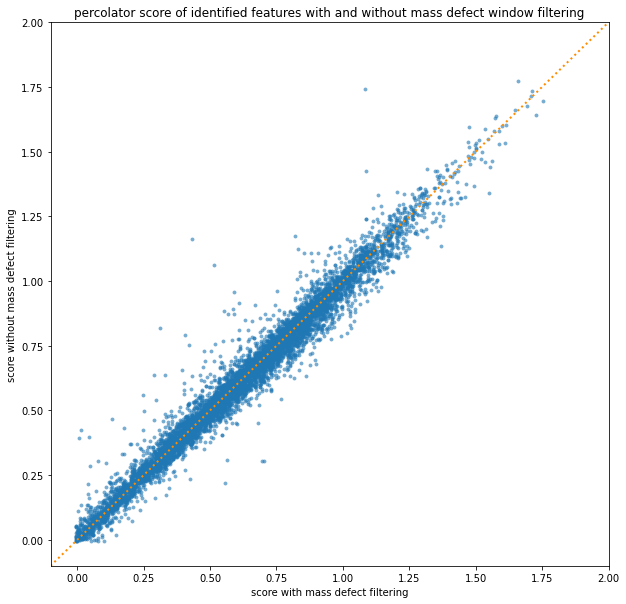

In [19]:
f, ax = plt.subplots()
f.set_figheight(10)
f.set_figwidth(10)

plt.margins(0.06)
plt.title('percolator score of identified features with and without mass defect window filtering')

ax.scatter(combined_df.score_with_fmdw, combined_df.score_without_fmdw, marker='o', lw=0, s=15, alpha=0.6)

ax.plot([0, 1], [0, 1], transform=ax.transAxes, linestyle=':', linewidth=2, color='darkorange')

plt.xlim((-0.1,2.0))
plt.ylim((-0.1,2.0))

plt.xlabel('score with mass defect filtering')
plt.ylabel('score without mass defect filtering')

plt.show()

##### show percentage improvement for each identification in common

In [34]:
combined_df = combined_df[(combined_df.score_without_fmdw != 0)]
combined_df['score_improvement'] = (combined_df.score_with_fmdw - combined_df.score_without_fmdw) / combined_df.score_without_fmdw * 100.0

In [42]:
average_improvement = combined_df.score_improvement.mean()
print('average improvement in score is {:.2f}%'.format(average_improvement))

average improvement in score is 2.65%


In [36]:
df = combined_df[abs(combined_df.score_improvement) <= 100]

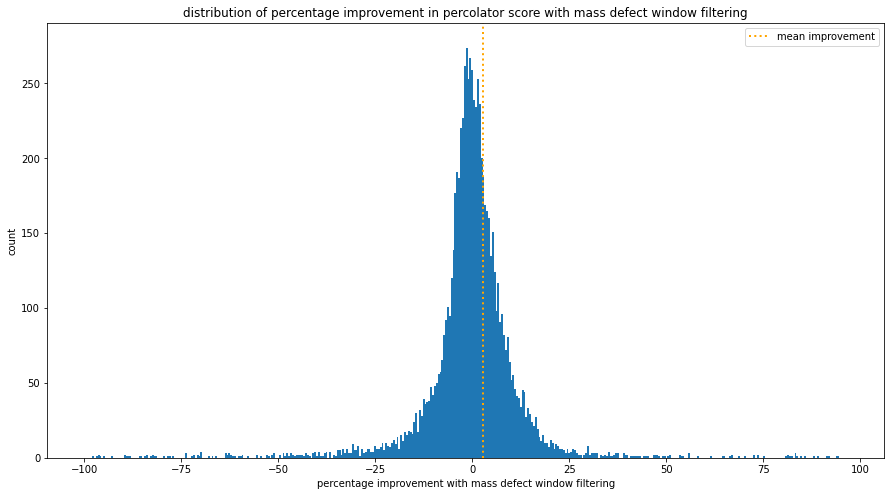

In [39]:
f, ax1 = plt.subplots()
f.set_figheight(8)
f.set_figwidth(15)

plt.margins(0.06)
plt.title('distribution of percentage improvement in percolator score with mass defect window filtering')

bins = 400
hist, bins, _ = plt.hist(df.score_improvement, bins=bins)
plt.xlabel('percentage improvement with mass defect window filtering')
plt.ylabel('count')

# plt.xlim((-50,50))
# plt.ylim((0,300))

plt.axvline(x=average_improvement, linestyle=':', linewidth=2, color='orange', label='mean improvement')

plt.legend()
plt.show()

#### compare identification q-value with and without

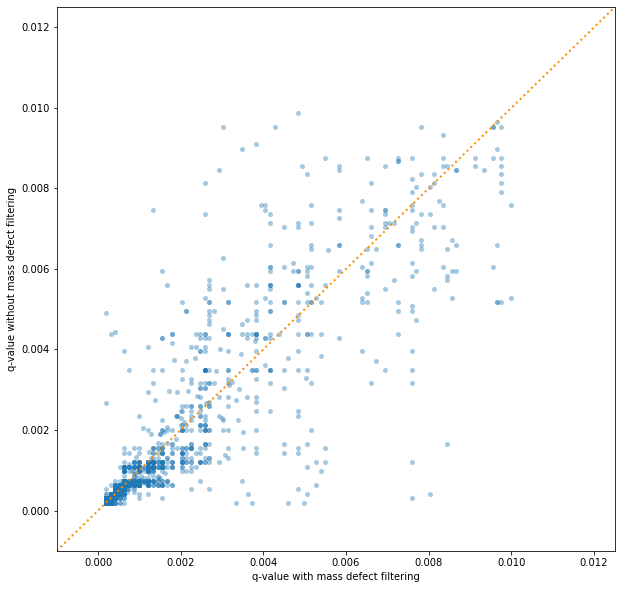

In [26]:
f, ax = plt.subplots()
f.set_figheight(10)
f.set_figwidth(10)

plt.margins(0.06)
plt.title('')

ax.scatter(combined_df.q_value_with_fmdw, combined_df.q_value_without_fmdw, marker='o', lw=0, s=25, alpha=0.4)

ax.plot([0, 1], [0, 1], transform=ax.transAxes, linestyle=':', linewidth=2, color='darkorange')

plt.xlim((-0.001,0.0125))
plt.ylim((-0.001,0.0125))

plt.xlabel('q-value with mass defect filtering')
plt.ylabel('q-value without mass defect filtering')

plt.show()

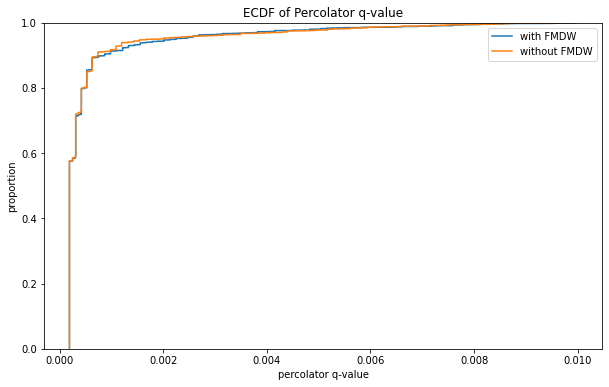

In [27]:
import seaborn as sns

plt.figure(figsize=(10, 6))

title = 'ECDF of Percolator q-value'
plt.title(title)

ax = sns.ecdfplot(data=combined_df, x="q_value_with_fmdw", label='with FMDW')
_ = sns.ecdfplot(data=combined_df, x="q_value_without_fmdw", label='without FMDW')
plt.legend(loc='best')
_ = ax.set(xlabel='percolator q-value', ylabel='proportion')

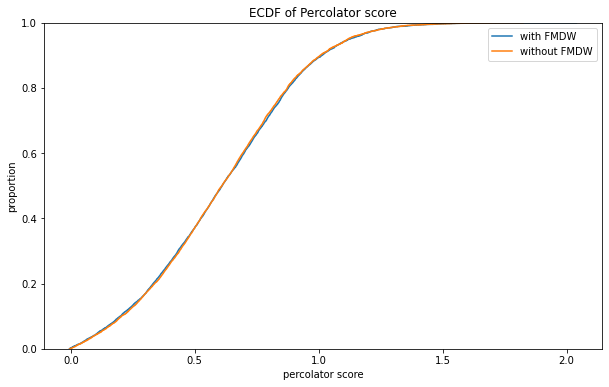

In [28]:
import seaborn as sns

plt.figure(figsize=(10, 6))

title = 'ECDF of Percolator score'
plt.title(title)

ax = sns.ecdfplot(data=combined_df, x="score_with_fmdw", legend=True, label='with FMDW')
_ = sns.ecdfplot(data=combined_df, x="score_without_fmdw", legend=True, label='without FMDW')
plt.legend(loc='best')
_ = ax.set(xlabel='percolator score', ylabel='proportion')

/home/daryl/anaconda3/envs/py36/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/daryl/anaconda3/envs/py36/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


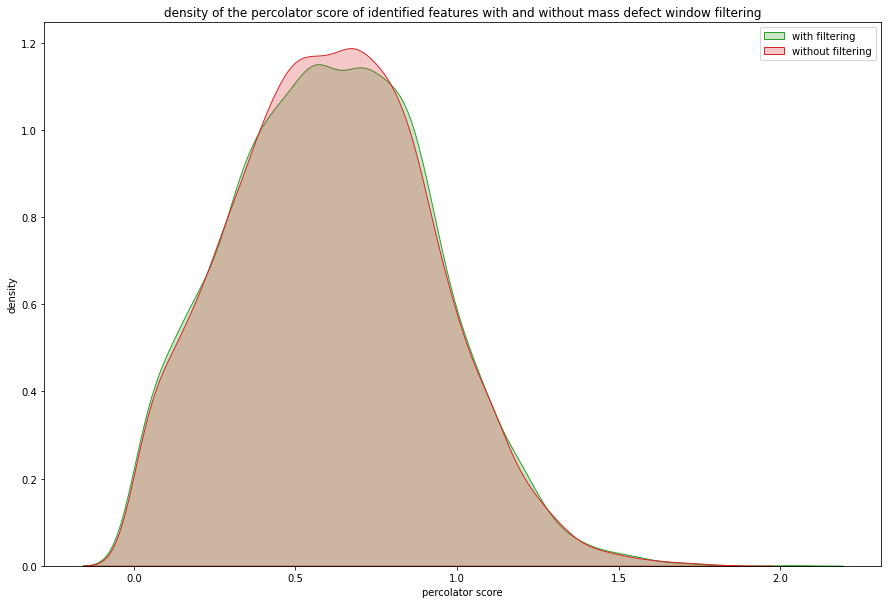

In [29]:
import seaborn as sns
plt.figure(figsize=(15, 10))

title = 'density of the percolator score of identified features with and without mass defect window filtering'
plt.title(title)

# plt.xlim((-4,4))
# plt.ylim((0,1))

ax = sns.distplot(combined_df.score_with_fmdw, hist = False, color='tab:green', kde = True, kde_kws = {'shade': True, 'linewidth': 1}, label = 'with filtering')
_ = sns.distplot(combined_df.score_without_fmdw, hist = False, color='tab:red', kde = True, kde_kws = {'shade': True, 'linewidth': 1}, label = 'without filtering')

_ = ax.set(xlabel='percolator score', ylabel='density')
_ = ax.legend()